In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

pd.set_option("display.max_columns", 100)

In [2]:
features_df = pd.read_csv("/content/training_set_features.csv", index_col="respondent_id")

In [8]:
labels_df = pd.read_csv("/content/training_set_labels.csv", index_col="respondent_id")

In [6]:
missing_labels_values = labels_df.isnull().sum()
missing_labels_values = missing_labels_values[missing_labels_values > 0]
display(missing_labels_values.sort_values(ascending=False))

,0


In [11]:
missing_values = features_df.isnull().sum()
missing_values = missing_values[missing_values > 0]
display(missing_values.sort_values(ascending=False))

,0
employment_occupation,13470
employment_industry,13330
health_insurance,12274
income_poverty,4423
doctor_recc_seasonal,2160
doctor_recc_h1n1,2160
rent_or_own,2042
employment_status,1463
marital_status,1408
education,1407


In [12]:
print("features_df.shape", features_df.shape)
features_df.head()

features_df.shape (26707, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [13]:
features_df.dtypes

,0
h1n1_concern,float64
h1n1_knowledge,float64
behavioral_antiviral_meds,float64
behavioral_avoidance,float64
behavioral_face_mask,float64
behavioral_wash_hands,float64
behavioral_large_gatherings,float64
behavioral_outside_home,float64
behavioral_touch_face,float64
doctor_recc_h1n1,float64


In [14]:
print("labels_df.shape", labels_df.shape)
labels_df.head()

labels_df.shape (26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [15]:
np.testing.assert_array_equal(features_df.index.values, labels_df.index.values)

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

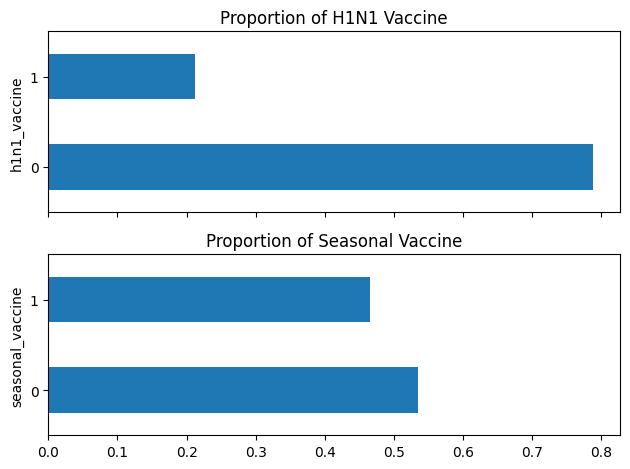

In [17]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = labels_df.shape[0]

(
    labels_df["h1n1_vaccine"]
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(
    labels_df["seasonal_vaccine"]
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

In [18]:
pd.crosstab(
    labels_df["h1n1_vaccine"], labels_df["seasonal_vaccine"], margins=True, normalize=True
)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


In [19]:
# Phi Coefficient is the same as Pearson for two binary variables
(labels_df["h1n1_vaccine"].corr(labels_df["seasonal_vaccine"], method="pearson"))

np.float64(0.37714265306144495)

In [20]:
joined_df = features_df.join(labels_df)
print(joined_df.shape)
joined_df.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [21]:
counts = (
    joined_df[["h1n1_concern", "h1n1_vaccine"]]
    .groupby(["h1n1_concern", "h1n1_vaccine"])
    .size()
    .unstack("h1n1_vaccine")
)
counts

h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


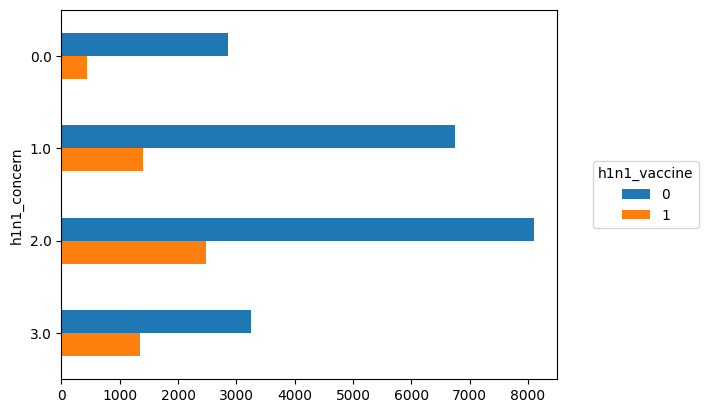

In [22]:
ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(loc="center right", bbox_to_anchor=(1.3, 0.5), title="h1n1_vaccine")

In [23]:
h1n1_concern_counts = counts.sum(axis="columns")
h1n1_concern_counts

,0
h1n1_concern,
0.0,3296
1.0,8153
2.0,10575
3.0,4591


In [24]:
props = counts.div(h1n1_concern_counts, axis="index")
props

h1n1_vaccine,0,1
h1n1_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


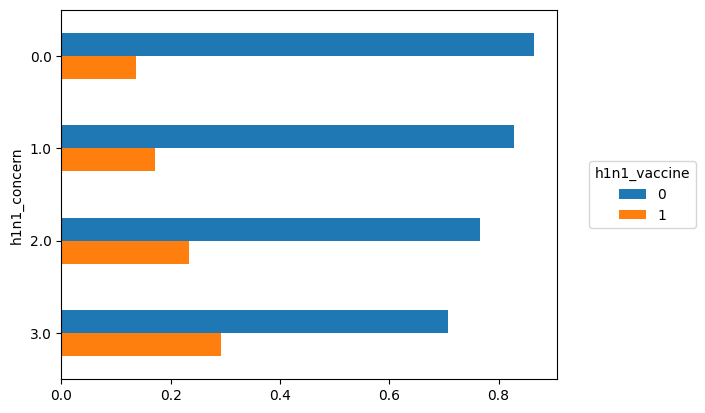

In [25]:
ax = props.plot.barh()
ax.invert_yaxis()
ax.legend(loc="center left", bbox_to_anchor=(1.05, 0.5), title="h1n1_vaccine")

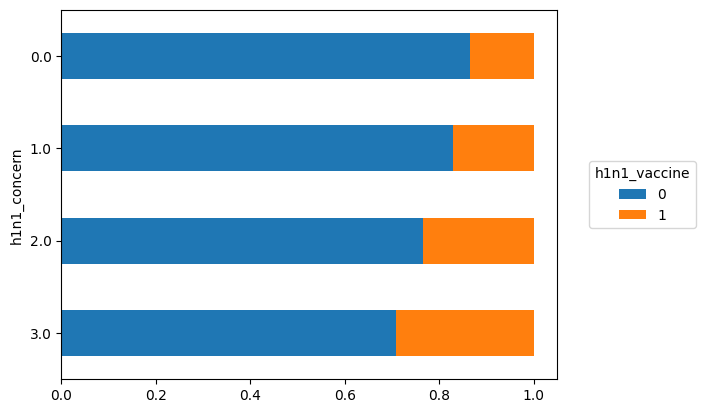

In [26]:
ax = props.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(loc="center left", bbox_to_anchor=(1.05, 0.5), title="h1n1_vaccine")

In [27]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against
    `col`.

    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes
            object to attach plot to
    """
    counts = joined_df[[target, col]].groupby([target, col]).size().unstack(target)
    group_counts = counts.sum(axis="columns")
    props = counts.div(group_counts, axis="index")

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

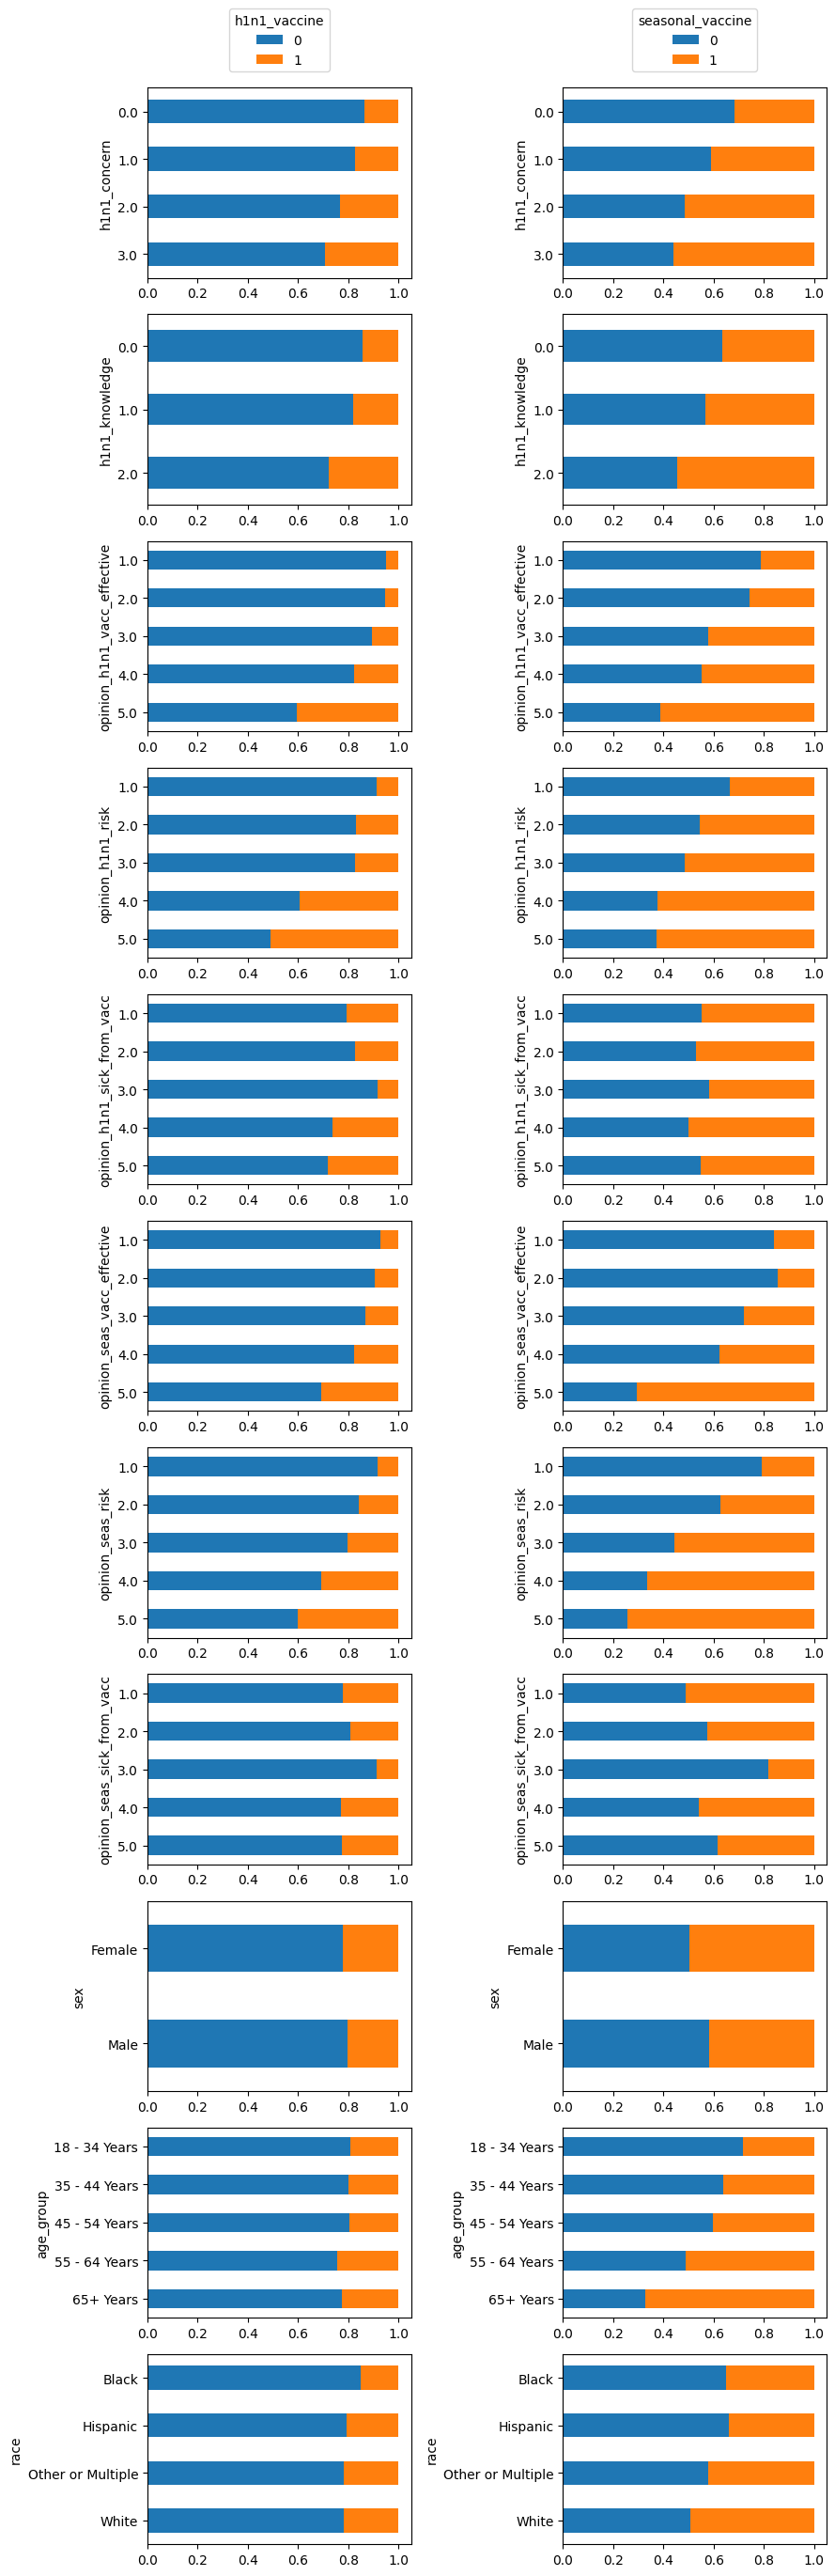

In [28]:
cols_to_plot = [
    "h1n1_concern",
    "h1n1_knowledge",
    "opinion_h1n1_vacc_effective",
    "opinion_h1n1_risk",
    "opinion_h1n1_sick_from_vacc",
    "opinion_seas_vacc_effective",
    "opinion_seas_risk",
    "opinion_seas_sick_from_vacc",
    "sex",
    "age_group",
    "race",
]

fig, ax = plt.subplots(len(cols_to_plot), 2, figsize=(9, len(cols_to_plot) * 2.5))
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(col, "h1n1_vaccine", joined_df, ax=ax[idx, 0])
    vaccination_rate_plot(col, "seasonal_vaccine", joined_df, ax=ax[idx, 1])

ax[0, 0].legend(loc="lower center", bbox_to_anchor=(0.5, 1.05), title="h1n1_vaccine")
ax[0, 1].legend(loc="lower center", bbox_to_anchor=(0.5, 1.05), title="seasonal_vaccine")
fig.tight_layout()

In [49]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

RANDOM_SEED = 6  # Set a random seed for reproducibility!

In [50]:
features_df.dtypes != "object"

,0
h1n1_concern,True
h1n1_knowledge,True
behavioral_antiviral_meds,True
behavioral_avoidance,True
behavioral_face_mask,True
behavioral_wash_hands,True
behavioral_large_gatherings,True
behavioral_outside_home,True
behavioral_touch_face,True
doctor_recc_h1n1,True


In [51]:
numeric_cols = features_df.columns[features_df.dtypes != "object"].values
print(numeric_cols)

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children']


In [52]:
# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline(
    [
        ("standard_scaler", StandardScaler()),
        ("simple_imputer", SimpleImputer(strategy="median")),
    ]
)

numeric_cols = features_df.columns[features_df.dtypes != "object"].values
categorical_cols = features_df.columns[features_df.dtypes == "object"].values
categorical_preprocessing_steps = Pipeline(
    [
        ("simple_imputer", SimpleImputer(strategy="most_frequent")),
        ("one_hot_encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_preprocessing_steps, numeric_cols),
        ("categorical", categorical_preprocessing_steps, categorical_cols),
    ],
    remainder="drop",
)

In [53]:
estimators = MultiOutputClassifier(estimator=LogisticRegression(penalty="l2", C=1))

In [54]:
full_pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("estimators", estimators),
    ]
)

In [55]:
full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  array(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa', 'employment_industry',
       'employment_occupation'], dtype=object))])),
                ('estimators',
                 MultiOutputClassifier(estimator=LogisticRegression(C=1)))])

In [56]:
X_train, X_eval, y_train, y_eval = train_test_split(
    features_df,
    labels_df,
    test_size=0.33,
    shuffle=True,
    stratify=labels_df,
    random_state=RANDOM_SEED,
)

In [57]:
%%time

# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
# This competition wants probabilities, not labels
preds = full_pipeline.predict_proba(X_eval)
preds

CPU times: user 2.37 s, sys: 1.98 ms, total: 2.37 s
Wall time: 1.31 s


[array([[0.70017815, 0.29982185],
        [0.91801345, 0.08198655],
        [0.77148922, 0.22851078],
        ...,
        [0.95862197, 0.04137803],
        [0.92310921, 0.07689079],
        [0.93245774, 0.06754226]]),
 array([[0.55566892, 0.44433108],
        [0.54970059, 0.45029941],
        [0.20060714, 0.79939286],
        ...,
        [0.74334496, 0.25665504],
        [0.89006416, 0.10993584],
        [0.0951999 , 0.9048001 ]])]

In [58]:
print("test_probas[0].shape", preds[0].shape)
print("test_probas[1].shape", preds[1].shape)


test_probas[0].shape (8814, 2)
test_probas[1].shape (8814, 2)


In [59]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index=y_eval.index,
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6728,0.299822,0.444331
16516,0.081987,0.450299
3106,0.228511,0.799393
16981,0.718104,0.916261
19111,0.234274,0.755611


In [37]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color="grey", linestyle="--")
    ax.set_ylabel("TPR")
    ax.set_xlabel("FPR")
    ax.set_title(f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}")

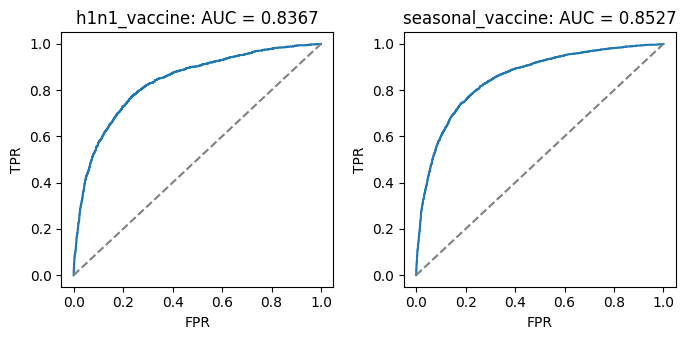

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(y_eval["h1n1_vaccine"], y_preds["h1n1_vaccine"], "h1n1_vaccine", ax=ax[0])
plot_roc(
    y_eval["seasonal_vaccine"], y_preds["seasonal_vaccine"], "seasonal_vaccine", ax=ax[1]
)
fig.tight_layout()

In [61]:
roc_auc_score(y_eval, y_preds)

np.float64(0.8447281683007323)

In [62]:
%%time

full_pipeline.fit(features_df, labels_df)

None  # So we don't print out the whole pipeline representation

CPU times: user 3.18 s, sys: 5.07 ms, total: 3.18 s
Wall time: 3.12 s


In [63]:
test_features_df = pd.read_csv("/content/test_set_features.csv", index_col="respondent_id")

In [64]:
test_probas = full_pipeline.predict_proba(test_features_df)
test_probas

[array([[0.94419419, 0.05580581],
        [0.95183246, 0.04816754],
        [0.5629908 , 0.4370092 ],
        ...,
        [0.86635963, 0.13364037],
        [0.93802803, 0.06197197],
        [0.41420371, 0.58579629]]),
 array([[0.70460276, 0.29539724],
        [0.95477128, 0.04522872],
        [0.4178436 , 0.5821564 ],
        ...,
        [0.80103983, 0.19896017],
        [0.63177754, 0.36822246],
        [0.46018011, 0.53981989]])]

In [65]:
submission_df = pd.read_csv("/content/submission_format.csv", index_col="respondent_id")

In [66]:
submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7
26710,0.5,0.7
26711,0.5,0.7


In [67]:
# Make sure we have the rows in the same order
np.testing.assert_array_equal(test_features_df.index.values, submission_df.index.values)

In [68]:
# Save predictions to submission data frame
submission_df["h1n1_vaccine"] = test_probas[0][:, 1]
submission_df["seasonal_vaccine"] = test_probas[1][:, 1]

submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.055806,0.295397
26708,0.048168,0.045229
26709,0.437009,0.582156
26710,0.496554,0.880840
26711,0.161411,0.471030


In [69]:
submission_df.to_csv("my_submission.csv", index=True)

In [70]:
!head my_submission.csv

respondent_id,h1n1_vaccine,seasonal_vaccine
26707,0.055805813426618264,0.295397239455501
26708,0.04816753737423305,0.04522872282629328
26709,0.4370092020495893,0.5821563964042447
26710,0.49655402981709607,0.8808399977522302
26711,0.1614107924761529,0.47102997434743166
26712,0.4564458782548484,0.9232811541397947
26713,0.341777790355188,0.5791533570985874
26714,0.14601411008021645,0.22132903479498248
26715,0.040720175986569566,0.1534407670438606


A summary of all the processing steps that have been completed, using one-hot enconding

Data Loading and Initial Exploration:

features_df and labels_df were loaded from CSV files.
Missing values in both dataframes were identified and displayed, confirming that labels_df had no missing values, while features_df had numerous columns with NaNs.bold text
Basic data shapes, head, and data types were inspected.
Exploratory Data Analysis (EDA):

Proportions of H1N1 and seasonal vaccine uptake were plotted.
A crosstab and Pearson correlation coefficient were calculated to show the relationship between H1N1 and seasonal vaccination.
features_df and labels_df were joined into joined_df.
A custom function vaccination_rate_plot was defined to visualize vaccination rates against various demographic and opinion-based features, and plots were generated for several key features.

Model Building and Training:
Necessary scikit-learn modules for preprocessing, model creation, and evaluation were imported.
Imputation of Missing Values added:
A numeric_preprocessing_steps pipeline was created using StandardScaler for scaling and SimpleImputer with a 'median' strategy for numerical columns.
A categorical_preprocessing_steps pipeline was created using SimpleImputer with a 'most_frequent' strategy for imputing categorical columns, followed by OneHotEncoder to convert them into a numerical format suitable for LogisticRegression.
These preprocessing steps were combined into a ColumnTransformer named preprocessor.
A MultiOutputClassifier with LogisticRegression as the base estimator was defined for handling the two target variables (H1N1 and seasonal vaccine).
A full_pipeline was constructed, combining the preprocessor and the estimators.

*Model Evaluation*:
The data was split into training and evaluation sets using train_test_split, with stratification to maintain class balance.
The full_pipeline was trained on the X_train and y_train data.
Predictions (probabilities) were generated on the X_eval set.
ROC curves were plotted for both H1N1 and seasonal vaccine predictions, along with their AUC scores.
The overall ROC AUC score for the multi-output prediction was calculated.
Final Prediction and Submission:

The full_pipeline was retrained on the entire features_df and labels_df.
test_features_df was loaded.
Predictions were made on test_features_df.
The predictions were saved into submission_df and then exported to a CSV file named my_submission.csv.
A preview of the my_submission.csv file was displayed.


The process of imputing missing values in features_df was successfully completed, and the entire modeling pipeline, including training, evaluation, and submission file generation, has been executed.

